In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import joblib
import pickle

In [18]:
from textblob import TextBlob

In [20]:
analysis = TextBlob(det_text).sentiment
analysis

Sentiment(polarity=0.0, subjectivity=0.0)

In [23]:
news_dataset['polarity'] = news_dataset['news'].apply(lambda x:TextBlob(x).polarity)

In [24]:
news_dataset['subjectivity'] = news_dataset['news'].apply(lambda x:TextBlob(x).subjectivity)

In [47]:
cnt, n_cnt = 0, 0
cnt2, n_cnt2 = 0, 0
for i in range(len(news_dataset)):
    if news_dataset.iloc[i][3] == 0:
        cnt += news_dataset.iloc[i][7]
        n_cnt += 1
    else:
        cnt2 += news_dataset.iloc[i][7]
        n_cnt2 += 1

print("Average subjectivity")
print(cnt / n_cnt, cnt2 / n_cnt2)

Average subjectivity
0.40376245916079245 0.34235272537763545


In [48]:
cnt, n_cnt = 0, 0
cnt2, n_cnt2 = 0, 0
for i in range(len(news_dataset)):
    if news_dataset.iloc[i][3] == 0:
        cnt += news_dataset.iloc[i][6]
        n_cnt += 1
    else:
        cnt2 += news_dataset.iloc[i][6]
        n_cnt2 += 1

print("Average polarity")
print(cnt / n_cnt, cnt2 / n_cnt2)

Average polarity
0.07342775732063947 0.06921014987882712


In [26]:
news_dataset

,subject,date,news,output,number_of_characters,number_of_words,polarity,subjectivity
0,News,2017-12-31,donald trump send embarrass new year eve messa...,0,1732,274,0.015869,0.513278
1,News,2017-12-31,drunk brag trump staffer start russian collus ...,0,1269,191,0.025174,0.288292
2,News,2017-12-30,sheriff david clark becom internet joke threat...,0,2240,357,-0.054137,0.486140
3,News,2017-12-29,trump obsess even obama name code websit imag ...,0,1743,286,-0.008523,0.341477
4,News,2017-12-25,pope franci call donald trump christma speechp...,0,1322,218,-0.034259,0.536111
...,...,...,...,...,...,...,...,...
44883,worldnews,2017-08-22,fulli commit nato back new u approach afghanis...,1,1778,269,0.084141,0.210657
44884,worldnews,2017-08-22,lexisnexi withdrew two product chines marketlo...,1,558,80,0.160000,0.340000
44885,worldnews,2017-08-22,minsk cultur hub becom authoritiesminsk reuter...,1,1195,178,0.103068,0.498977
44886,worldnews,2017-08-22,vatican upbeat possibl pope franci visit russi...,1,820,123,-0.021849,0.231933


In [27]:
news_dataset.to_csv('polarity_subjectivity.csv', index=False)

In [28]:
news_dataset['output']. corr(news_dataset['polarity'])

-0.01518946843002476

In [29]:
news_dataset['output']. corr(news_dataset['subjectivity'])

-0.21598576536784483

In [34]:
from scipy. stats import pearsonr

In [35]:
pearsonr(news_dataset['output'], news_dataset['subjectivity'])

(-0.2159857653678565, 0.0)

In [36]:
pearsonr(news_dataset['output'], news_dataset['polarity'])

(-0.015189468430025672, 0.00128972403666695)

<AxesSubplot:>

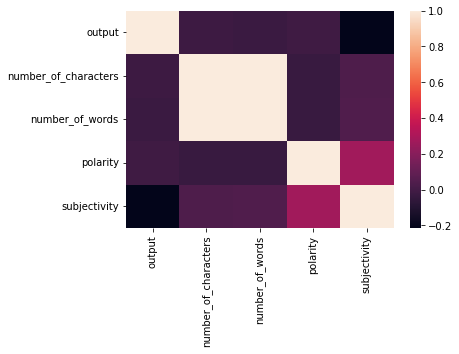

In [38]:
sns.heatmap(news_dataset.corr())

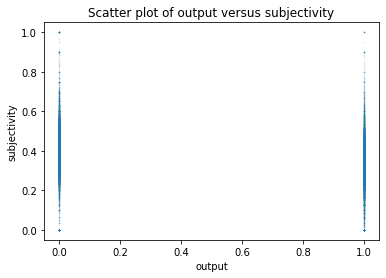

In [49]:
plt.plot(news_dataset['output'], news_dataset['subjectivity'], 'o', alpha=0.02, markersize=1)

plt.xlabel('output')
plt.ylabel('subjectivity')
plt.title('Scatter plot of output versus subjectivity');